# Clustering and Manifold Learning  

Name: Darren King
Student_ID: 17145031

In [364]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.cluster import DBSCAN


In [365]:
# Load in the dataset 

df = pd.read_csv("./loans_train_prepared-1.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

In [366]:
print(df.describe())

       Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%    

In [367]:
# Are ApplicantIncome, LoanAmount and TotalIncome appropriately scaled? Consider rescaling these attributes. 
scaler = StandardScaler()

In [368]:
# Load data into a numpy array - (or just use the data as is in a dataframe?)
data = np.array(df.values)
print('Number of samples:', data.shape[0])
print('Number of attributes/features per sample:', data.shape[1])

Number of samples: 614
Number of attributes/features per sample: 16


We don't need to concern ourselves with casting everything to a 64 bit float or a 64 bit integer.

# Task 2

##  K-Means Clustering

Use the Elbow method to pick the best value for k.

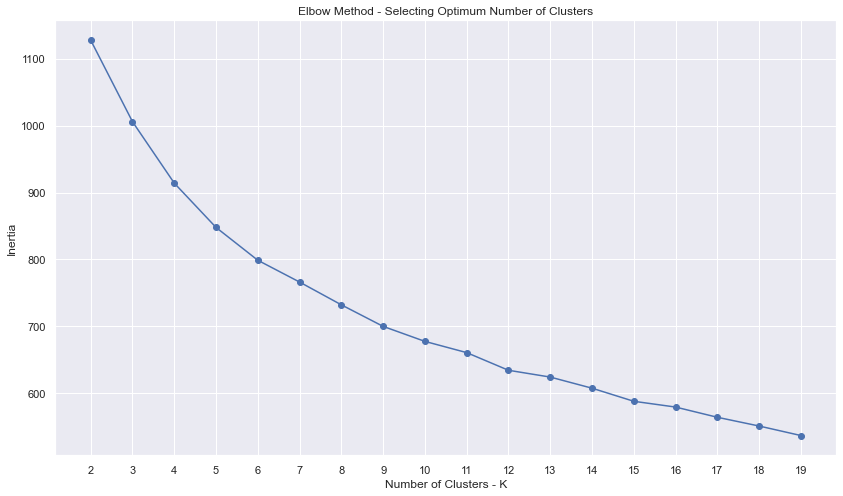

In [369]:
inertia_list = []
k_range = range(2,20)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertia_list.append(model.inertia_)

plt.figure(figsize=(14,8))
plt.plot(k_range, inertia_list, marker = 'o')
plt.title('Elbow Method - Selecting Optimum Number of Clusters')
plt.xticks(k_range)
plt.xlabel('Number of Clusters - K')
plt.ylabel('Inertia')
plt.show()

Use the Silhouette method to pick the best value for k.

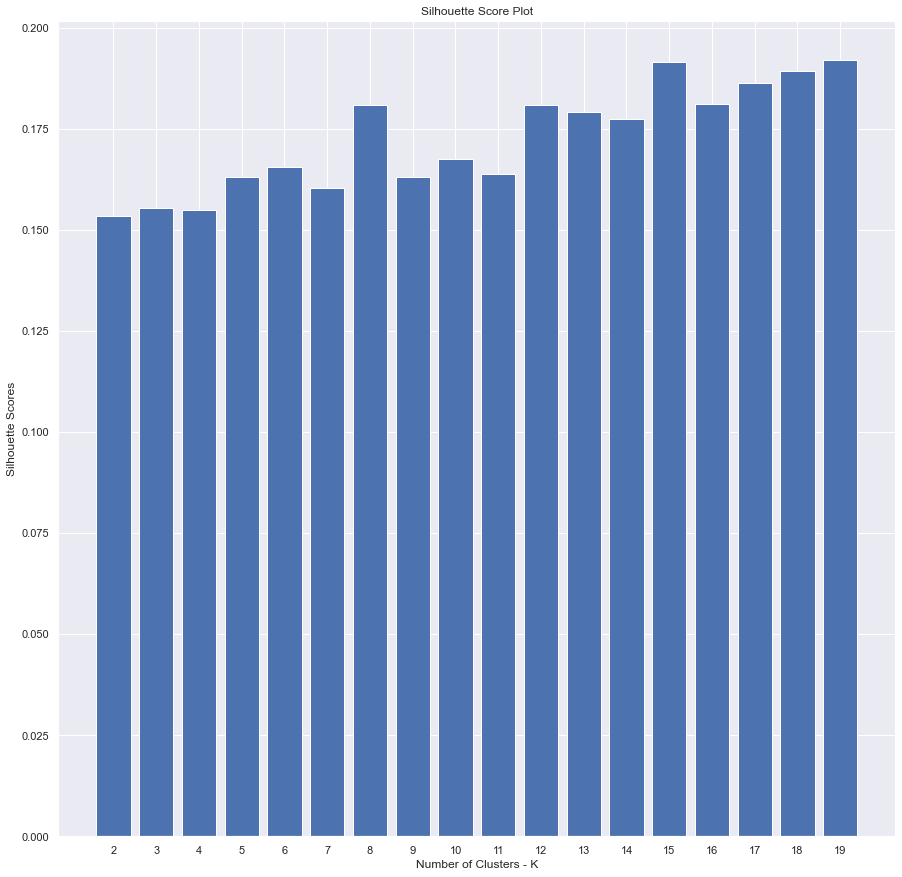

In [370]:
score_list = []

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    pred=model.predict(data)
    score = silhouette_score(data,pred,metric='euclidean')
    score_list.append(score)

plt.bar(k_range, score_list)
plt.title("Silhouette Score Plot")
plt.xticks(k_range)
plt.xlabel('Number of Clusters - K')
plt.ylabel('Silhouette Scores')
plt.show()

On the bend/elbow we have the values 6,7,8,9 - each worth trying with different techniques. By silhouette scoring 8 appears to have the highest score before we climb into higher clustering values.

In [371]:
# Define our model and fit our model to our data
k = 8
model = KMeans (n_clusters=k, init='k-means++', n_init=15, max_iter=200, random_state=42)
model_data = model.fit(data)

# Extracting the centroids from the fitted data within the model - before dimensionality reduction
centroids = model_data.cluster_centers_
# Extracting the labels from the fitted data within the model - before dimensionality reduction
labels = model_data.labels_
# Appending the centroids to the original dataset
data_and_centres = np.r_[data, centroids]

In [372]:
# Reduce the 16 dimensions to a 2-dimensional or 3-dimensional space through manifold learning
# Linear dimensionality reduction techniques such as PCA are not great for non-linear data

In [373]:
# Isomap - Isometric Mapping - extending upon Kernel PCA or MDS (Multi-Dimensional Scaling)
# Maintains geodesic distances between all points
isomap_embedding_model = Isomap(n_components=2) #Bring the data down to 2-dimensions

embedded_data_and_centroids = isomap_embedding_model.fit_transform(data_and_centres)

embedded_data = embedded_data_and_centroids[:-k,:]
embedded_centroids = embedded_data_and_centroids[-k:,:]

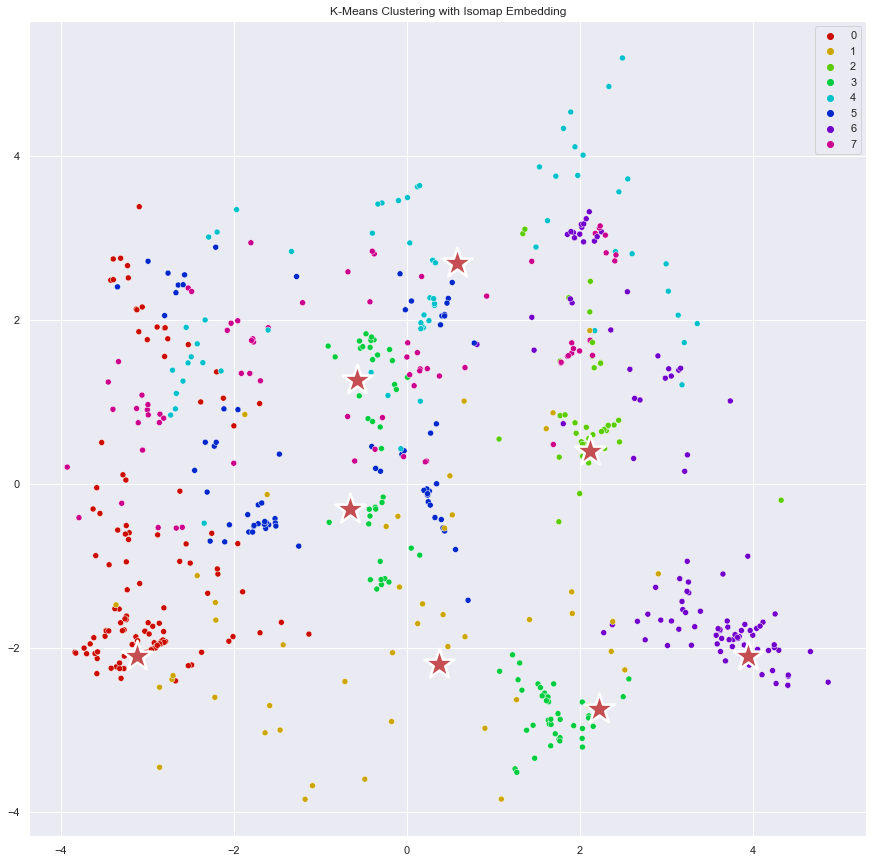

In [374]:
# Graphing our output
sns.set(rc={"figure.figsize":(15,15)})
palette = sns.hls_palette(len(set(labels)), l=0.4, s=1.0)
sns.scatterplot(x=embedded_data[:,0], y=embedded_data[:,1], hue=labels, legend='full', palette=palette)
sns.scatterplot(x=embedded_centroids[:,0], y=embedded_centroids[:,1], color='r', s=1000, marker="*")
plt.title("K-Means Clustering with Isomap Embedding")
plt.show()

Here I've used an Isomap embedding for dimensionality reduction purposes. The clusters aren't very evident. Isomap embedding is typically used to discover the non-linear degrees of freedom that underlie complex natural observations including human handwriting and facial images. Isomap efficiently computes a globally optimum solution. Is this the reason that the clusters aren't very evident - local associations are lost in preservation of the overall global sturucture?

In [375]:
tsne_model = TSNE(verbose=1, perplexity=10)

embedded_data_and_centroids = tsne_model.fit_transform(data_and_centres)

embedded_data = embedded_data_and_centroids[:-k,:]
embedded_centroids = embedded_data_and_centroids[-k:,:]

/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 622 samples in 0.000s...
[t-SNE] Computed neighbors for 622 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 622 / 622
[t-SNE] Mean sigma: 0.353028
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.044846
[t-SNE] KL divergence after 1000 iterations: 0.563883


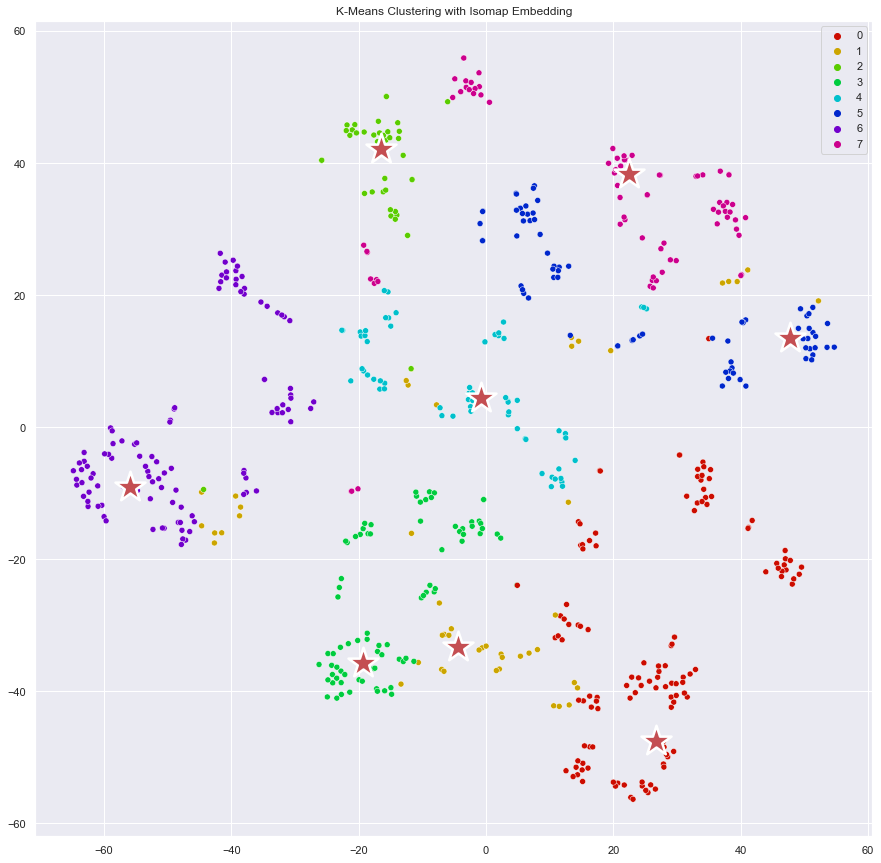

In [376]:
# Graphing our output
sns.set(rc={"figure.figsize":(15,15)})
palette = sns.hls_palette(len(set(labels)), l=0.4, s=1.0)
sns.scatterplot(x=embedded_data[:,0], y=embedded_data[:,1], hue=labels, legend='full', palette=palette)
sns.scatterplot(x=embedded_centroids[:,0], y=embedded_centroids[:,1], color='r', s=1000, marker="*")
plt.title("K-Means Clustering with TSNE Embedding")
plt.show()

With TSNE our embeddings are more evident, but we still have evident outliers in the majority of our clusters. Unlike Isomap embedding, TSNE tends to be sensitive to local structures within the data and will tend to extract clustered local groups of data. By altering the perplexity of the TSNE we can tune the number of local versus global points within clusters.  UMAP is an improvement on the TSNE dimensionality reduction technique but utilises an older version of Numpy (as required by Numba) but it works very well in terms of dimensionality reduction.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 622 samples in 0.000s...
[t-SNE] Computed neighbors for 622 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 622 / 622

/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(



[t-SNE] Mean sigma: 0.563353
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.268723
[t-SNE] KL divergence after 1000 iterations: 0.625162


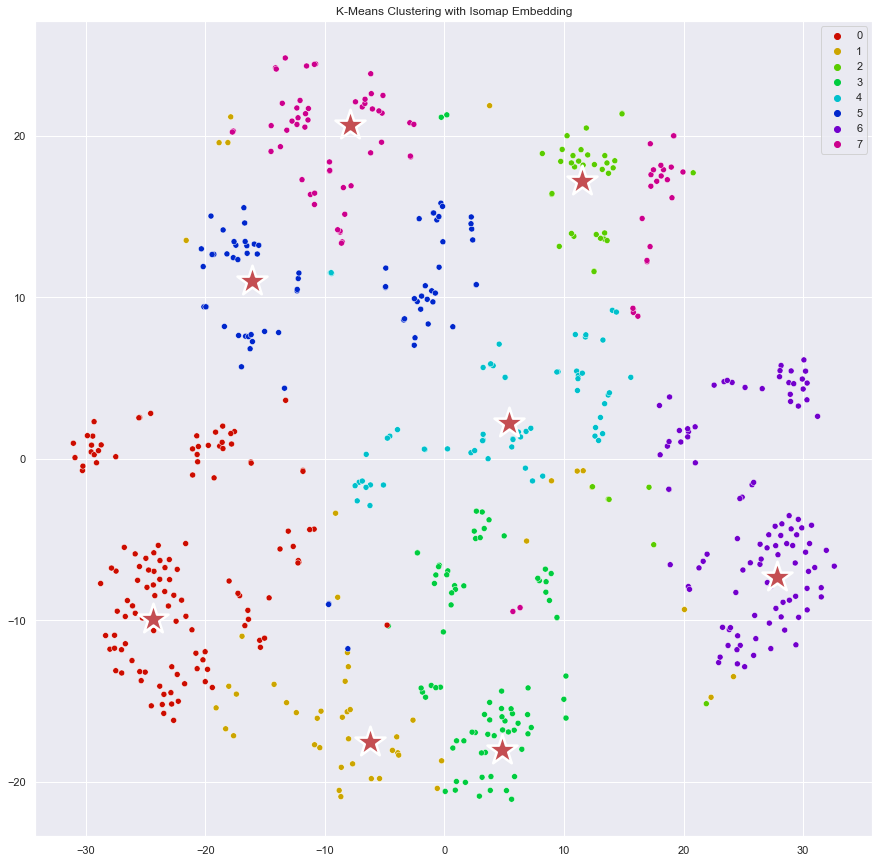

In [377]:
tsne_model = TSNE(verbose=1, perplexity=30)

embedded_data_and_centroids = tsne_model.fit_transform(data_and_centres)

embedded_data = embedded_data_and_centroids[:-k,:]
embedded_centroids = embedded_data_and_centroids[-k:,:]

# Graphing our output
sns.set(rc={"figure.figsize":(15,15)})
palette = sns.hls_palette(len(set(labels)), l=0.4, s=1.0)
sns.scatterplot(x=embedded_data[:,0], y=embedded_data[:,1], hue=labels, legend='full', palette=palette)
sns.scatterplot(x=embedded_centroids[:,0], y=embedded_centroids[:,1], color='r', s=1000, marker="*")
plt.title("K-Means Clustering with TSNE Embedding")
plt.show()

Use another clustering algorithm and an appropriate manifold-learning technique to visualise it

/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change

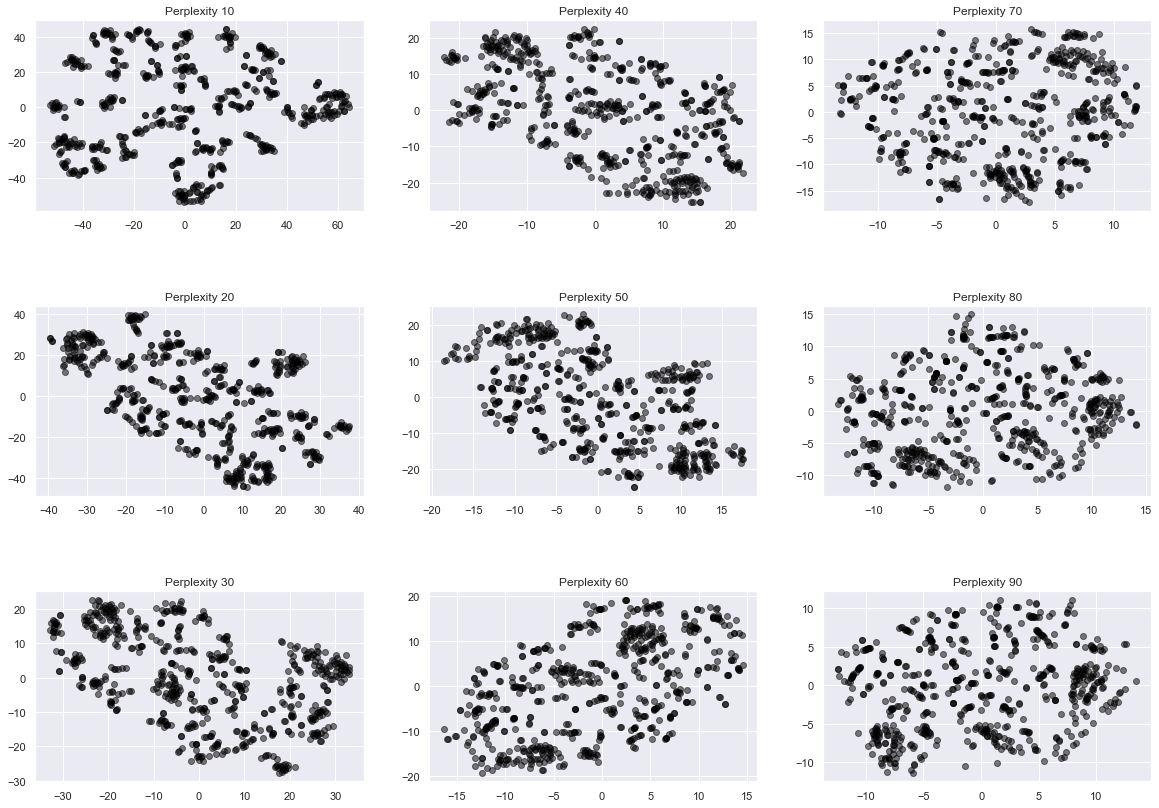

In [378]:
# Using t-SNE for dimensionality reduction - tune the perplexity hyperparameter

perplexity_list = [10,20,30,40,50,60,70,80,90]

fig, ax = plt.subplots(3,3,figsize = (20,14))
plt.subplots_adjust(hspace=0.5)

# tune the perplexity hyperparameter

for i, perplexity in enumerate(perplexity_list):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_fit = tsne.fit_transform(data)

    ax[i%3][math.floor(i/3)].set_title(f'Perplexity {perplexity}')
    ax[i%3][math.floor(i/3)].scatter(tsne_fit[:,0], tsne_fit[:,1], color='black', alpha=0.5)

From the above it's very difficult to discern potential clusters of data in any of the varying perplexities. DBSCAN can be very effective at dealing with outliers in data and looking at perplexity 70 I feel there may be some clusters with outliers so let's try DBSCAN against TSNE with a perplexity of 70.

In [379]:
# Using DBSCAN we have 2 hyper-parameters worth considering
# eps - sets the radius that a cluster can look for neighbour points
# min_samp defines the min number of points within the eps range required to qualify as a cluster

model = DBSCAN(eps=3, min_samples=5).fit(data)

# Extracting the centroids from the fitted data within the model - before dimensionality reduction
centroids = model_data.cluster_centers_
# Extracting the labels from the fitted data within the model - before dimensionality reduction
labels = model_data.labels_
# Appending the centroids to the original dataset
data_and_centres = np.r_[data, centroids]

tsne = TSNE(n_components=2, perplexity=70)
embedded_data_and_centroids = tsne.fit_transform(data_and_centres)

embedded_data = embedded_data_and_centroids[:-k,:]
embedded_centroids = embedded_data_and_centroids[-k:,:]

/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


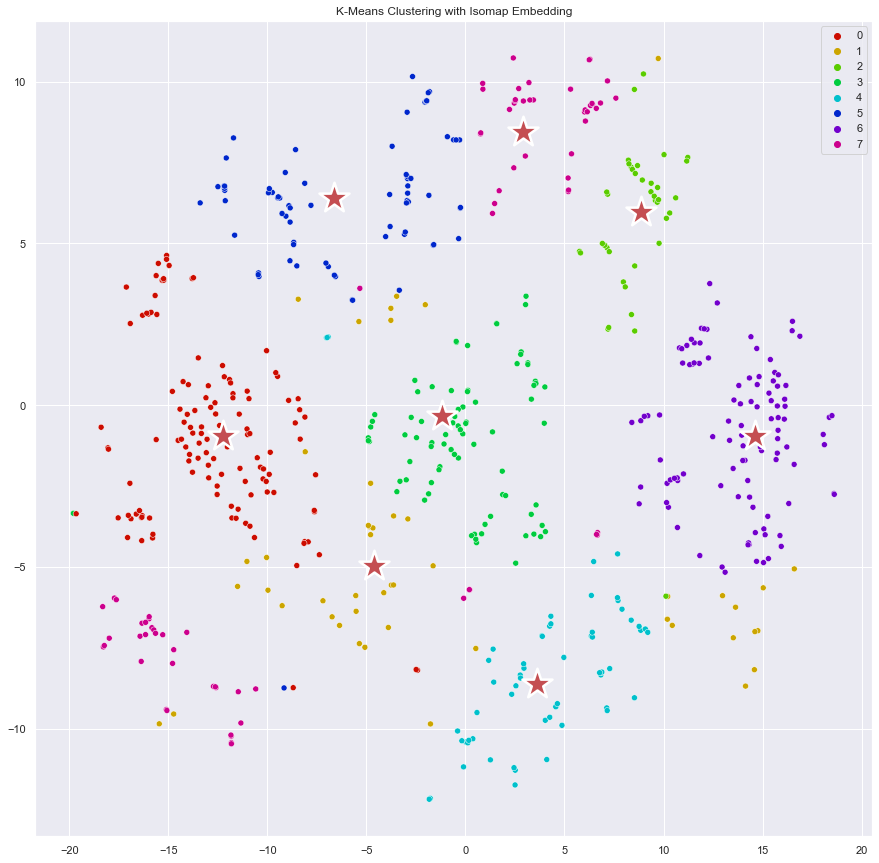

In [380]:
# Graphing our output
sns.set(rc={"figure.figsize":(15,15)})
palette = sns.hls_palette(len(set(labels)), l=0.4, s=1.0)
sns.scatterplot(x=embedded_data[:,0], y=embedded_data[:,1], hue=labels, legend='full', palette=palette)
sns.scatterplot(x=embedded_centroids[:,0], y=embedded_centroids[:,1], color='r', s=1000, marker="*")
plt.title("DBSCAN Clustering with TSNE Embedding")
plt.show()